In [11]:
# Import required libraries
import pandas as pd                                                   # For data loading and manipulation
import numpy as np                                                    # For numerical operations
import matplotlib.pyplot as plt                                       # For data visualization
import joblib                                                         # Used for loading the saved model
import streamlit as st                                                # Used to build the interactive web app interface
from sklearn.pipeline import Pipeline                                 # To build model pipelines
from sklearn.compose import ColumnTransformer                         # To apply preprocessing to specific columns
# For encoding categorical data and scaling numerical data
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, LabelEncoder       
from sklearn.impute import SimpleImputer                              # To fill missing values
from sklearn.model_selection import train_test_split                  # To split data into train/test sets
from sklearn.tree import DecisionTreeClassifier                       # Decision Tree model
from sklearn.neighbors import KNeighborsClassifier                    # KNN model
# IsolationForest: Outlier detection, Others: Ensemble classifiers
from sklearn.ensemble import IsolationForest, RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier                                     # XGBoost model
from lightgbm import LGBMClassifier                                   # LightGBM model
from sklearn.metrics import classification_report, accuracy_score     # To evaluate model performance

In [12]:
#Load the dataset
data=pd.read_csv('/Users/amanjavelin/Documents/AICTE Internships/Edunet IBM Skillsbuild/Employee Dataset.csv')
print(f"Original shape: {data.shape}")
data.head(10)

Original shape: (14900, 24)


,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed
5,3496,45,Female,30,Healthcare,8104,Fair,High,Average,0,...,0,Senior,Large,75,No,No,No,Good,Low,Stayed
6,46775,22,Female,5,Healthcare,8700,Good,High,Average,0,...,0,Mid,Small,48,No,No,No,Poor,High,Stayed
7,72645,34,Female,15,Technology,11025,Fair,Medium,High,1,...,4,Entry,Large,16,No,No,No,Good,Low,Left
8,4941,48,Female,40,Technology,11452,Good,Medium,Below Average,0,...,1,Mid,Large,52,No,No,No,Good,Medium,Stayed
9,65181,55,Female,16,Media,5939,Poor,High,Average,0,...,1,Entry,Small,46,No,No,No,Good,High,Stayed


In [13]:
# Columns before dropping
print("Columns before dropping:")
print(data.columns.tolist())

# Dropping irrelevant columns
data=data.drop(columns=['Employee ID', 'Distance from Home', 'Number of Dependents', 'Attrition'])

# Columns after dropping
print("\nColumns after dropping:")
print(data.columns.tolist())

Columns before dropping:
['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role', 'Monthly Income', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Number of Promotions', 'Overtime', 'Distance from Home', 'Education Level', 'Marital Status', 'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', 'Attrition']

Columns after dropping:
['Age', 'Gender', 'Years at Company', 'Job Role', 'Monthly Income', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Number of Promotions', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Company Tenure', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition']


In [14]:
# Convert binary categorical columns ('Yes'/'No') to numeric (1/0)
binary_columns = ['Overtime', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities']
data[binary_columns] = data[binary_columns].replace({"Yes": 1, "No": 0})

# Function to detect outliers
def detect_outliers(data, columns, contamination=0.05):
    outlier_indices = set()
    # Isolation Forest
    iso = IsolationForest(contamination=contamination, random_state=42)
    iso_outliers = data[iso.fit_predict(data[columns]) == -1]
    outlier_indices.update(iso_outliers.index)
    print(f"Total unique outliers detected: {len(outlier_indices)}")
    return list(outlier_indices)
    
numeric_columns = ['Age', 'Years at Company', 'Number of Promotions', 'Company Tenure'] + binary_columns
outliers = detect_outliers(data, numeric_columns)

# Drop the detected outliers from the dataset
data_cleaned = data.drop(index=outliers)

# Function to classify salary
def salary_class(income):
    if income < 7000:
        return 'Low'
    else:
        return 'High'
data_cleaned['Salary Class'] = data_cleaned['Monthly Income'].apply(salary_class)

# Print the shape of the cleaned dataset
print(f"Cleaned shape: {data_cleaned.shape}")

Total unique outliers detected: 745
Cleaned shape: (14155, 21)


/var/folders/q5/fcs0ldjs2lg293g02ctkzv6m0000gn/T/ipykernel_5409/598435773.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[binary_columns] = data[binary_columns].replace({"Yes": 1, "No": 0})


In [15]:
ordinal_columns = {
    'Education Level': ['High School', 'Associate Degree', 'Bachelor’s Degree', 'Master’s Degree', 'PhD'],
    'Job Level': ['Entry', 'Mid', 'Senior'],
    'Work-Life Balance': ['Poor', 'Fair', 'Good', 'Excellent'],
    'Job Satisfaction': ['Low', 'Medium', 'High', 'Very High'],
    'Performance Rating': ['Low', 'Below Average', 'Average', 'High'],
    'Company Reputation': ['Poor', 'Fair', 'Good', 'Excellent'],
    'Employee Recognition': ['Low', 'Medium', 'High', 'Very High']
}

# Separate the actual list of ordinal column names
ordinal_column_names = list(ordinal_columns.keys())

numerical_columns = ['Age', 'Years at Company', 'Number of Promotions', 'Company Tenure'] + binary_columns

categorical_columns = ['Gender', 'Job Role', 'Marital Status', 'Company Size']

# Ordinal preprocessing pipeline
ordinal_pipeline = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='most_frequent')),
    ('Encoder', OrdinalEncoder(categories=list(ordinal_columns.values())))
])

# Numerical preprocessing pipeline
numerical_pipeline = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='mean')),
    ('Scaler', StandardScaler())
])

# Categorical preprocessing pipeline
categorical_pipeline = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='most_frequent')),
    ('Encoder', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')) 
])
                        
# Combine into a ColumnTransformer
preprocessing = ColumnTransformer(transformers=[
    ('Ordinal', ordinal_pipeline, ordinal_column_names),
    ('Numerical', numerical_pipeline, numerical_columns),
    ('Categorical', categorical_pipeline, categorical_columns)
])

In [16]:
# Separate features and target variable
X = data_cleaned.drop(['Monthly Income', 'Salary Class'], axis=1)
y = data_cleaned['Salary Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Label Encoding
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Define multiple classification models to evaluate
models = {
    "Decision Tree": DecisionTreeClassifier(),  
    "Random Forest": RandomForestClassifier(),    
    "AdaBoost": AdaBoostClassifier(),  
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(verbosity=0, use_label_encoder=False, random_state=42),
    "LightGBM": LGBMClassifier(verbose=-1, random_state=42),
}

results = {}

# Train and evaluate each model using pipeline
for name, model in models.items():
    pipeline = Pipeline(steps=[('Preprocessing', preprocessing), 
                               ('Model', model)])
    pipeline.fit(X_train, y_train_encoded)
    y_pred = pipeline.predict(X_test)
    
    acc = accuracy_score(y_test_encoded, y_pred)
    results[name] = acc

    # Print model performance
    print(f"\n{name}")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test_encoded, y_pred, zero_division=0, target_names=['Low (<7k)', 'High (>7k)']))

# Find the best model 
best_model_name = "LightGBM"
print(f"\nBest model: {best_model_name} with accuracy {results[best_model_name]:.4f}\n")

# Re-train the best model pipeline on the full data (X, y)
best_model = models[best_model_name]
final_pipeline = Pipeline(steps=[('Preprocessing', preprocessing), ('Model', best_model)])
final_pipeline.fit(X, le.transform(y))


Decision Tree
Accuracy: 0.8336
              precision    recall  f1-score   support

   Low (<7k)       0.86      0.83      0.84      1880
  High (>7k)       0.81      0.84      0.83      1659

    accuracy                           0.83      3539
   macro avg       0.83      0.83      0.83      3539
weighted avg       0.83      0.83      0.83      3539


Random Forest
Accuracy: 0.9130
              precision    recall  f1-score   support

   Low (<7k)       0.87      0.99      0.92      1880
  High (>7k)       0.99      0.83      0.90      1659

    accuracy                           0.91      3539
   macro avg       0.93      0.91      0.91      3539
weighted avg       0.92      0.91      0.91      3539


AdaBoost
Accuracy: 0.9135
              precision    recall  f1-score   support

   Low (<7k)       0.87      0.99      0.92      1880
  High (>7k)       0.99      0.83      0.90      1659

    accuracy                           0.91      3539
   macro avg       0.93      0.91    

/Users/amanjavelin/.pyenv/versions/3.11.9/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



LightGBM
Accuracy: 0.9130
              precision    recall  f1-score   support

   Low (<7k)       0.87      0.99      0.92      1880
  High (>7k)       0.98      0.83      0.90      1659

    accuracy                           0.91      3539
   macro avg       0.93      0.91      0.91      3539
weighted avg       0.92      0.91      0.91      3539


Best model: LightGBM with accuracy 0.9130



,steps,"[('Preprocessing', ...), ('Model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('Ordinal', ...), ('Numerical', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [17]:
# Save the final trained pipeline and label encoder
joblib.dump(final_pipeline, 'SalaryClassifier.pkl')      
joblib.dump(le, 'LabelEncoder.pkl')                      
default_values = {}

for col in X.columns:
    if X[col].dtype == 'object':
        default_values[col] = X[col].mode()[0]
    else:
        default_values[col] = X[col].mean()

print(default_values)
joblib.dump(default_values, "Default Values.pkl")

{'Age': np.float64(38.221900388555284), 'Gender': 'Male', 'Years at Company': np.float64(15.375768279759802), 'Job Role': 'Technology', 'Work-Life Balance': 'Good', 'Job Satisfaction': 'High', 'Performance Rating': 'Average', 'Number of Promotions': np.float64(0.809184033910279), 'Overtime': np.float64(0.3157894736842105), 'Education Level': 'Bachelor’s Degree', 'Marital Status': 'Married', 'Job Level': 'Mid', 'Company Size': 'Medium', 'Company Tenure': np.float64(55.417661603673615), 'Remote Work': np.float64(0.1700459201695514), 'Leadership Opportunities': np.float64(0.027764040974920523), 'Innovation Opportunities': np.float64(0.1386789120452137), 'Company Reputation': 'Good', 'Employee Recognition': 'Low'}


['Default Values.pkl']

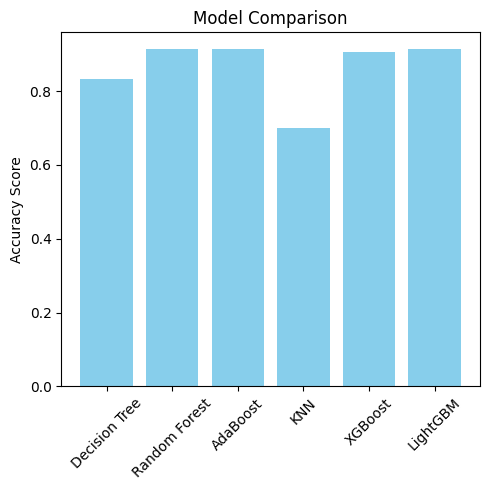

In [18]:
# Performavce isualizatiion graph
plt.figure(figsize=(5, 5)) 
bars = plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.yticks()
plt.tight_layout()
plt.show()